In [169]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as impg
import numpy as np
import helpers                                   #importing important liberaries 

import os
import glob

In [170]:
images_dir_training = "C:\\Users\\saini\\Desktop\\training"
images_dir_testing = "C:\\Users\\saini\\Desktop\\testing"            #patho dataset


In [171]:
#creatin helper function:
def load_dataset(img_dir):   #creating a function to load dataset
    img_list = [] #creating empty list
    img_types = ['Day','Night'] #defining how many type of images i have in training folder
    for image_type in img_types:
        for file in glob.glob(os.path.join(img_dir,image_type,"*")):
            im = impg.imread(file)          #reading file            
            if not im is None:
                img_list.append((im,image_type))
    return img_list

In [172]:
image_list = load_dataset(images_dir_training)
img_list # we can see that an image is an multidimensional array

[(array([[[ 32,  64,  41],
          [ 33,  62,  40],
          [ 37,  64,  45],
          ...,
          [254, 254, 254],
          [254, 254, 254],
          [254, 254, 254]],
  
         [[ 18,  50,  29],
          [ 23,  52,  32],
          [ 35,  62,  43],
          ...,
          [254, 254, 254],
          [254, 254, 254],
          [254, 254, 254]],
  
         [[  7,  36,  18],
          [  0,  26,   8],
          [  9,  36,  19],
          ...,
          [254, 254, 254],
          [254, 254, 254],
          [254, 254, 254]],
  
         ...,
  
         [[ 72,  84,  82],
          [ 71,  83,  81],
          [ 70,  82,  80],
          ...,
          [125, 151, 152],
          [125, 151, 152],
          [125, 151, 152]],
  
         [[ 72,  84,  82],
          [ 71,  83,  81],
          [ 70,  82,  80],
          ...,
          [125, 151, 152],
          [125, 151, 152],
          [125, 151, 152]],
  
         [[ 72,  84,  82],
          [ 71,  83,  81],
          [ 70,  82,  80

In [173]:
image_index =100
image = image_list[image_index][0]                       #CHECKING THE DATASET
label = image_list[image_index][1]
print(image.shape,label)

(260, 640, 3) Night


In [174]:
def standarize_input(im):
    standardize_img = cv2.resize(im,(1200,600))
    
    return standardize_img
img = standarize_input(image)             #STANDARIZING THE INPUT DATA IMAGES
print(img.shape)

(600, 1200, 3)


In [175]:
def encoding(Label):            #LABELLING THE DAY NAD NIGHT CLASS
    numerical_val =0
    if (Label =="Day"):
        numerical_val = 1
        
    return numerical_val
encoding(label)

0

In [176]:
def standarize(image_list):                      #CREATING A NEW LIST TO GTE IMAGE AND LABEL TOGETHER
    standard_list  = []
    for item in image_list:
        image = item[0]
        label = item[1]
        
        standarized_img = standarize_input(image)
        binary_label = encoding(label)
        standard_list.append((standarized_img,binary_label))
    return standard_list

In [177]:
standarized_list = standarize(image_list)      #CALLING STANDARIZE LIST

Text(0.5, 1.0, '1')

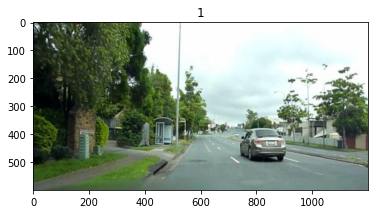

In [185]:
image_num =   4                          #VISUALIZATION
plt.imshow(standarized_list[image_num][0])
plt.title(standarized_list[image_num][1])

# Feature extraction

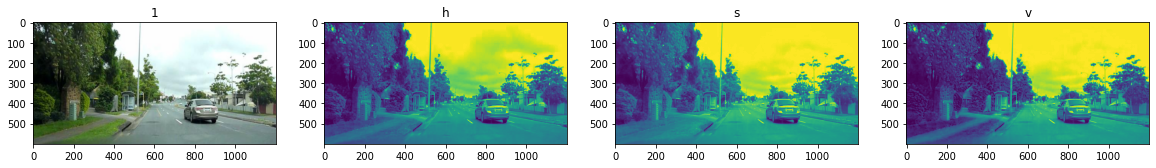

In [186]:
hsv = cv2.cvtColor(testing_image ,cv2.COLOR_RGB2HSV)
h = testing_image[:,:,0]
s= testing_image[:,:,1]
v=testing_image[:,:,2]
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (20,10))
ax1.set_title(testing_label)
ax1.imshow(testing_image)

ax2.set_title("h")
ax2.imshow(h)                                               #CONVERTING RGB TO HSV 

ax3.set_title("s")
ax3.imshow(s)

ax4.set_title("v")
ax4.imshow(v)

In [187]:
#DEFINING avg value of image
def avg_image(rgb_image):
    hsv = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2HSV)                 #CREATING AN ALGORITHM
    brightness_sum = np.sum(hsv[:,:,2])
    area = 600*1200
    avg_brightness = brightness_sum/area
    return avg_brightness
    

# classification function

In [188]:
def classifier(rgb_image):
    avg_value = avg_image(rgb_image)
    
    predicted_val = 0                               #CREATING CLASSIFIER FUNCTION
    threshold = 100
    if avg_value> threshold:
        predicted_val = 1
        
    return predicted_val


In [189]:
import random
testing_list = load_dataset(images_dir_testing)
testing_standarize_list = standarize(training_list)              #IMPORT TEST DATASET AND SUFFLED IT
random.shuffle(testing_standarize_list)

In [190]:
def misclassified_image(images):
    misclassified_images = []                          #CRATING MISCLASSIFIER FUNCTION 
    for image in images:
        im = image[0]
        true_label= image[1]
        predicted_label =classifier(im)
        
        if predicted_label != true_label:
            misclassified_images.append((im, true_label,predicted_label))
    return  misclassified_images
            

 # ACCURACY  

In [191]:
misclassification  = misclassified_image(testing_standarize_list)
total_images = len(testing_standarize_list)
correct_classification = total_images - len(misclassification)
accuracy  = correct_classification/total_images
print("accuracy of the model is " + str(accuracy ))
print(str(len(misclassification))+"out of "+str(total_images) +"are missclassified")

accuracy of the model is 0.7777777777777778
14out of 63are missclassified
